In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import MDS

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

import scipy as sp

In [4]:
import lib

In [5]:
plt.rcParams["font.family"] = 'DejaVu Serif'

plt.rcParams['text.usetex'] = True

In [6]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

# Разбиение ряда на кластеры

In [7]:
T = 40
K = 2

# series_name = '2_patern'
# X_test = pd.read_csv('./SyntheticData/'+series_name+'/6.csv').values.reshape([1,-1,1])

data = pd.read_csv('./RealData/2.csv')
X_test = data.values[100:1000, 2:3].reshape([1,-1,1])

List_of_x = np.arange(T, X_test[0].shape[0] - 2*T)

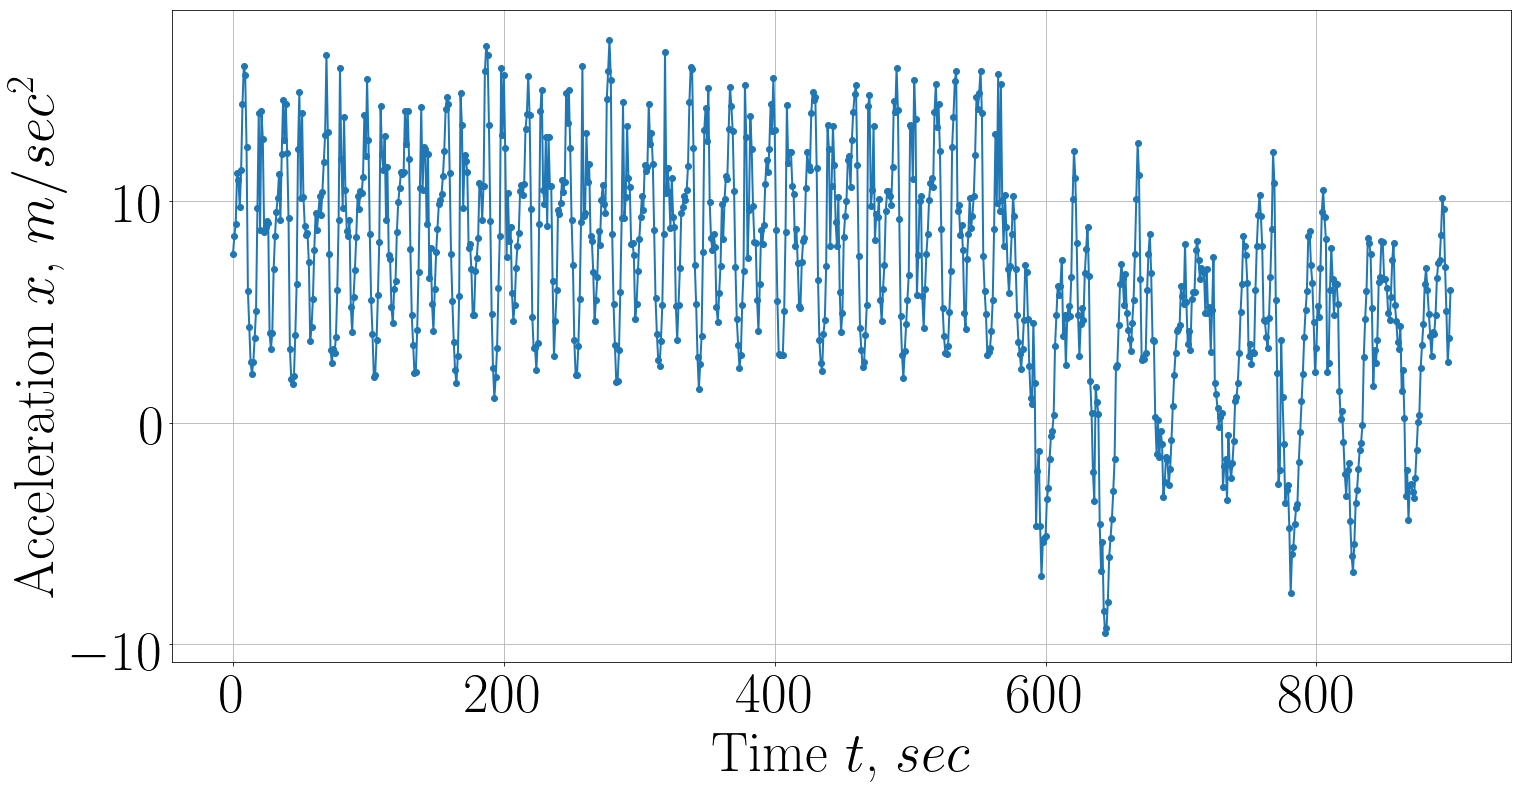

In [8]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
#################################################

_ = plt.plot(X_test[0], '-o')

plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
plt.grid()
plt.show()

In [9]:
phase_track = lib.return_phase_track(X_test, T)

List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c = lib.local_basis(phase_track, T = T)

M_pairwise = lib.get_pairwise_matrix(List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c)


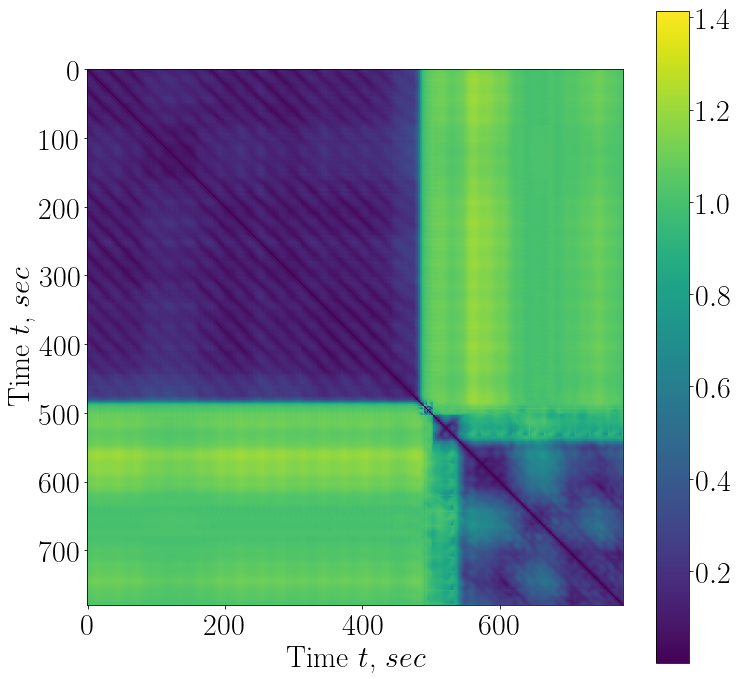

In [10]:
Text_size = 30

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = Text_size
#################################################

_ = plt.imshow(M_pairwise)

_ = plt.colorbar()

plt.xlabel('Time $t$, $sec$')
plt.ylabel('Time $t$, $sec$')
plt.show()

In [11]:
model = AgglomerativeClustering(n_clusters=K, affinity='precomputed', linkage='complete')

fitted = model.fit(M_pairwise)
prediction_vector = fitted.fit_predict(M_pairwise)


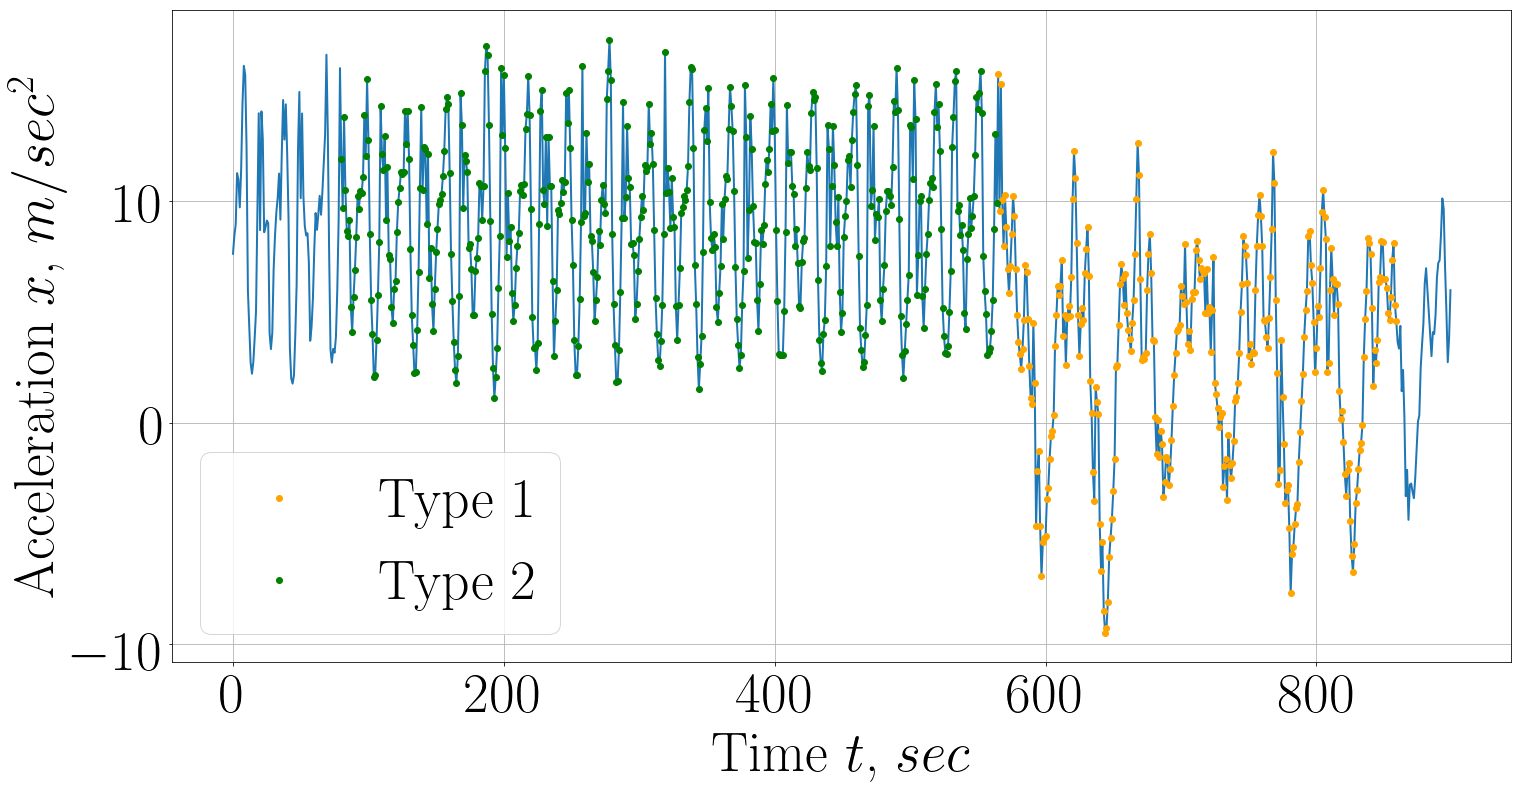

In [12]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
#################################################
color = ['orange', 'green', 'red', 'yelow', 'blue']

_ = plt.plot(X_test[0], '-')

for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = plt.plot(List_of_x[ind]+T, X_test[0][2*T:X_test[0].shape[0]-T][ind], 'o', color = color[t], label = 'Type ' + str(t + 1))



plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
# plt.savefig('./results/'+series_name+'_claster_vector.png', bbox_inches='tight')
plt.show()

# Сегментация

In [15]:
# List_new_t = np.linspace(np.min(List_of_t), np.max(List_of_t), 5000)
# X = sp.interpolate.interp1d(List_of_t, X[0,:,0], kind='cubic')(List_new_t).reshape([1,-1,1])
# List_of_t = np.arange(0, X.shape[1], 1)

In [14]:
List_of_All, List_of_point = lib.segmentation(X_test[:, 2*T:X_test[0].shape[0]-T, :], prediction_vector, T)

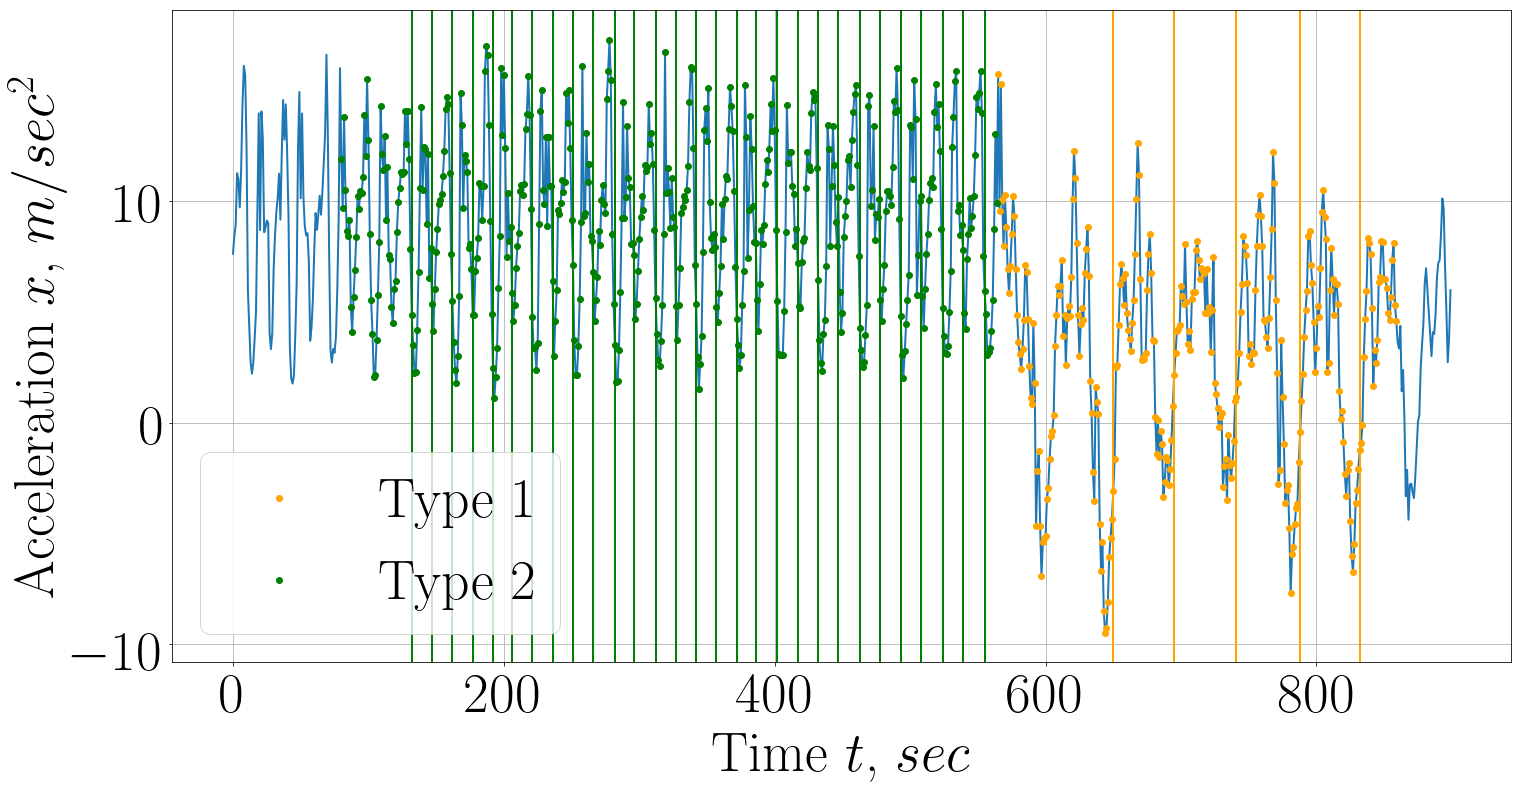

In [16]:
Text_size = 56

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = Text_size
#################################################
color = ['orange', 'green', 'red', 'yelow', 'blue']

_ = plt.plot(X_test[0], '-')

for t in np.unique(prediction_vector):
#     _ = plt.plot(List_of_x[0] + T, 0, color = color[t], label = 'Type ' + str(t + 1))
    ind = List_of_point[t] + T
    for x in (List_of_x + T)[ind]:
        _ = plt.axvline(x = x, color = color[t])
        
    
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = plt.plot(List_of_x[ind]+T, X_test[0][2*T:X_test[0].shape[0]-T][ind], 'o', color = color[t], label = 'Type ' + str(t + 1))



plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Time $t$, $sec$')
plt.ylabel('Acceleration $x$, $m/sec^2$')
plt.show()


In [17]:
index = 0

_, _, List_of_points_plus, List_of_points_minus, List_of_t_plus, List_of_t_minus, line_point, ress = List_of_All[index]


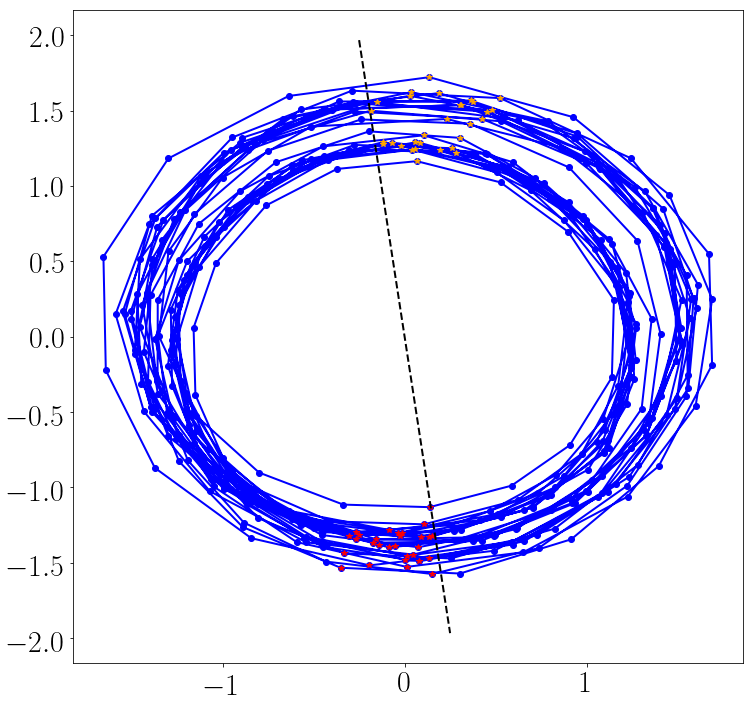

In [23]:
Text_size = 30

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['font.size'] = Text_size
#################################################

_ = plt.plot(ress[:, 0], ress[:, 1], '-o', color = 'blue')

for point in List_of_points_plus:
    _ = plt.plot(point[0], point[1], '*', color = 'orange')
for point in List_of_points_minus:
    _ = plt.plot(point[0], point[1], '*', color = 'red')

x_line = np.array([-.25, .25])
k = line_point[1]/line_point[0]
y_line = k*x_line

_ = plt.plot(x_line, y_line, '--', color = 'black')

# plt.xlabel('Time $x$, $sec$')
# plt.ylabel('Time $y$, $sec$')
# plt.savefig('./results/'+series_name+'_full.png', bbox_inches='tight')
plt.show()